# 1. Basic 1

### Preparation

In [1]:
# Import modules
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


### Generate Data

In [2]:
# Generate data
input_data = torch.randn(1,      # Batch size
                         1,      # Number of Channel
                         28, 28) # Size of images
print(input_data)

tensor([[[[ 1.3722e-02, -4.8771e-01,  2.8388e-02, -1.7463e+00, -1.5629e-01,
           -1.2186e+00,  1.5612e+00,  3.4330e-01, -5.3134e-01,  9.8587e-01,
            6.6082e-01,  6.4375e-01, -9.8570e-01,  1.0114e+00, -1.2335e+00,
           -5.5883e-01, -8.8671e-01, -9.2684e-01, -1.4405e+00, -8.7493e-01,
            1.3214e+00,  6.6883e-01, -1.4005e-01,  1.0425e+00,  1.2444e+00,
           -1.7434e+00, -8.4748e-01, -1.4541e+00],
          [ 5.5382e-02,  1.6248e+00, -4.6548e-01, -2.8970e-01,  1.8901e+00,
           -1.1563e+00,  6.0770e-01,  4.7029e-01, -1.0873e+00, -7.1976e-01,
           -3.5203e-01,  5.4694e-01,  3.4680e-01, -8.7862e-01, -1.4785e+00,
           -1.6818e+00, -1.7066e+00, -3.9695e-01, -3.9818e-01,  1.4804e-02,
            2.1901e+00, -7.1886e-01, -3.0909e-01, -5.1637e-01, -1.4319e+00,
           -1.5826e+00, -8.3063e-01, -1.0523e+00],
          [-1.2874e+00, -1.3387e+00,  1.2611e+00,  1.9202e+00,  1.7684e+00,
           -1.1609e+00,  3.0584e-01, -4.2764e-01,  7.5718e-01,

### Set Convolution Layers

In [3]:
# Define a convolution layer
conv = nn.Conv2d(in_channels = 1,
                out_channels = 16,
                kernel_size = 3,
                stride = 2,
                padding = 1)

# Get the result
output = conv(input_data)
print(output.shape)

torch.Size([1, 16, 14, 14])


### Visualization

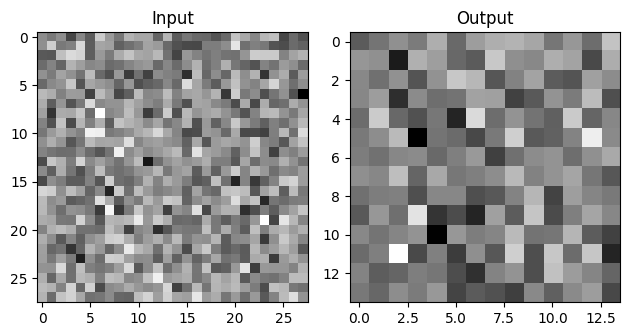

In [4]:
# Visualization
plt.subplot(1, 2, 1)
plt.imshow(input_data.squeeze(), cmap='gray')
plt.title('Input')

plt.subplot(1, 2, 2)
plt.imshow(output.squeeze()  # Remove a single-dimensional dimensions
           .detach()         # Detach the tensor from computation graph          
           .numpy()[0],      # Convert tensors to NumPy arrays
           cmap='gray')
plt.title('Output')

plt.tight_layout()
plt.show()

# 2. Basic 2

### Preparation

In [5]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchvision import transforms

from PIL import Image

### Load Images

In [6]:
# Load images
image_path = './data/0630-surprised_cat.jpg'
input_image = Image.open(image_path).convert('L')  # 'convert('L')': Convert to grayscale mode
#input_data = torch.unsqueeze(torch.from_numpy(np.array(input_image)), dim = 0).float()
                        # 'np.array(input_image)': Convert a PIL image object to a NumPy array
                        # 'torch.from_numpy()': Create a PyTorch tensor from a NumPy array
                        # 'torch.unsqueeze(, dim=0)': Add a singleton dimension to the tensor at 'dim=0'
input_data = transforms.ToTensor()(input_image).unsqueeze(0)

### Set Convolutional Layers

In [7]:
# Define a convolutional layer
conv = nn.Conv2d(in_channels = 1,
                 out_channels = 1,
                 kernel_size = 3,
                 dilation = 2)   # Dilation Rate -> 'dilation=2': one zero-valued padding between elements of kernel

# Get the result
output = conv(input_data)
print(output.shape)

torch.Size([1, 1, 179, 271])


### Visualization

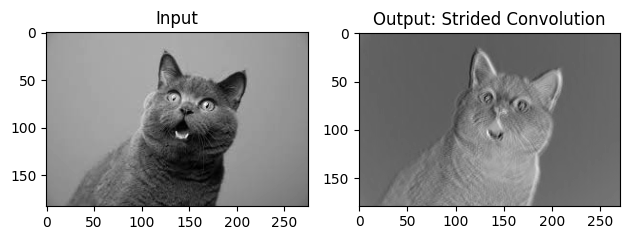

In [8]:
# Visualization
plt.subplot(1, 2, 1)
plt.imshow(input_data.squeeze().detach().numpy(), cmap='gray')
plt.title('Input')

plt.subplot(1, 2, 2)
plt.imshow(output.squeeze()  # Remove a single-dimensional dimensions
           .detach()         # Detach the tensor from computation graph          
           .numpy(),         # Convert tensors to NumPy arrays
           cmap='gray')
plt.title('Output: Strided Convolution')

plt.tight_layout()
plt.show()